In [145]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Reading the file and setting the 2nd column as header
df = pd.read_excel("bankdata_stats.xlsx",header = 2)

# Changing the index
df = df.set_index("customerid")
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
customerid,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### joedu column

In [3]:
# splitting one column into two
column_4 = df.iloc[:,4]
job =[]
education = []
for i in column_4:
    temp = i.split(",")
    job.append(temp[0])
    education.append(temp[1])

In [4]:
# removing the "jobedu" column
del df["jobedu"]
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
customerid,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [5]:
# inserting the new columns at required index
df.insert(4,"job",job)
df.insert(5,"education",education)

In [6]:
# renaming column names
df = df.rename(columns = {"marital":"marital_status","housing":"housing_loan","loan":"other_loans","contact":"contact_type","duration":"call_duration","poutcome":"previous_outcome","response":"response","previous":"previous_contact","pdays":"passedby_days"})
df.head()

,age,salary,balance,marital_status,job,education,targeted,default,housing_loan,other_loans,contact_type,day,month,call_duration,campaign,passedby_days,previous_contact,previous_outcome,response
customerid,,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,management,tertiary,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
2,44.0,60000,29,single,technician,secondary,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
3,33.0,120000,2,married,entrepreneur,secondary,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
4,47.0,20000,1506,married,blue-collar,unknown,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
5,33.0,0,1,single,unknown,unknown,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
# checking null values in the dataframe
df.isnull().sum()

age                 20
salary               0
balance              0
marital_status       0
job                  0
education            0
targeted             0
default              0
housing_loan         0
other_loans          0
contact_type         0
day                  0
month               50
call_duration        0
campaign             0
passedby_days        0
previous_contact     0
previous_outcome     0
response            30
dtype: int64

In [8]:
## handling null values in (Age,month,response) columns

### month column

In [9]:
# df["month"] - forward fill with previous values
df["month"].fillna(method='ffill', inplace=True)

### age column

In [10]:
# comparing null values in age with different columns
age_df = df.loc[df["age"].isnull()]

In [11]:
# finding age median for all jobs
df.groupby("job")["age"].median()

job
admin.           38.0
blue-collar      39.0
entrepreneur     41.0
housemaid        47.0
management       38.0
retired          59.0
self-employed    39.0
services         37.0
student          26.0
technician       37.0
unemployed       40.0
unknown          47.0
Name: age, dtype: float64

In [12]:
# replacing the null values with median age
jobs = df.groupby("job")["age"].median().index
values = df.groupby("job")["age"].median().values
for x,y in zip(df.groupby("job")["age"].median().index,df.groupby("job")["age"].median().values):
    df.loc[(df["age"].isna()) & (df["job"] == x), "age"] = y

### salary column

In [13]:
salary_df = df.loc[df["salary"]=="?"]

In [14]:
# replacing "?" with 1 
df['salary'] = df['salary'].replace("?",1 )

In [15]:
df.groupby("job")["salary"].median()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

In [16]:
df.groupby("education")["salary"].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

In [17]:
df1 = df.groupby(['job', 'education'])[['salary']].agg([ "mean","count"])

In [18]:
df.groupby("job")["balance"].median()

job
admin.           396.0
blue-collar      388.0
entrepreneur     352.0
housemaid        406.0
management       572.0
retired          787.0
self-employed    526.0
services         339.5
student          502.0
technician       421.0
unemployed       529.0
unknown          677.0
Name: balance, dtype: float64

In [19]:
jobs1 = df.groupby("job")["salary"].median().index
values2 = df.groupby("job")["salary"].median().values
for x,y in zip(df.groupby("job")["salary"].median().index,df.groupby("job")["salary"].median().values):
    df.loc[(df["salary"] == 1) & (df["job"] == x), "salary"] = y

In [20]:
df["salary"].unique()

array([100000,  60000, 120000,  20000,      0,  55000,  50000,  70000,
         8000,  16000,   4000], dtype=int64)

In [21]:
# Data cleaning within the columns
# drop all null values
df.dropna(axis = 0,how = "any" ,inplace = True)

In [22]:
df.isnull().sum()

age                 0
salary              0
balance             0
marital_status      0
job                 0
education           0
targeted            0
default             0
housing_loan        0
other_loans         0
contact_type        0
day                 0
month               0
call_duration       0
campaign            0
passedby_days       0
previous_contact    0
previous_outcome    0
response            0
dtype: int64

In [23]:
df["job"].value_counts()

blue-collar      9727
management       9454
technician       7592
admin.           5166
services         4150
retired          2263
self-employed    1575
entrepreneur     1486
unemployed       1303
housemaid        1239
student           938
unknown           288
Name: job, dtype: int64

In [24]:
df["marital_status"].value_counts(normalize =True)

married     0.601912
single      0.282907
divorced    0.115181
Name: marital_status, dtype: float64

In [25]:
df["education"].value_counts(normalize = True)

secondary    0.513247
tertiary     0.294194
primary      0.151480
unknown      0.041079
Name: education, dtype: float64

In [26]:
df["previous_outcome"].value_counts()

unknown    36935
failure     4897
other       1839
success     1510
Name: previous_outcome, dtype: int64

In [27]:
df["contact_type"].value_counts()

cellular     29267
unknown      13010
telephone     2904
Name: contact_type, dtype: int64

In [28]:
df["response"].isnull().sum()

0

### changing seconds into minutes

In [29]:
# changing all values into minutes 
#df["Call_duration"] = df["Call_duration"].astype(str)
call =[]
for j in df["call_duration"]:
    if j.endswith("sec"):
        temp =j.split(" ")
        sec = int(temp[0])
        minutes = np.round(sec/60,decimals=2)
        call.append(minutes)
    else:
        temp2 =j.split(" ")
        mins = float(temp2[0])
        mins_round = np.round(mins,decimals=2)
        call.append(mins_round)
len(call)

45181

In [30]:
# inserting the new column in df
df.insert(14,"call_duration(min)",call)
del df["call_duration"]

In [31]:
df["month"].unique()

array(['may, 2017', 'jun, 2017', 'jul, 2017', 'aug, 2017', 'oct, 2017',
       'nov, 2017', 'dec, 2017', 'jan, 2017', 'feb, 2017', 'mar, 2017',
       'apr, 2017', 'sep, 2017'], dtype=object)

In [32]:
df.head()

,age,salary,balance,marital_status,job,education,targeted,default,housing_loan,other_loans,contact_type,day,month,call_duration(min),campaign,passedby_days,previous_contact,previous_outcome,response
customerid,,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,management,tertiary,yes,no,yes,no,unknown,5,"may, 2017",4.35,1,-1,0,unknown,no
2,44.0,60000,29,single,technician,secondary,yes,no,yes,no,unknown,5,"may, 2017",2.52,1,-1,0,unknown,no
3,33.0,120000,2,married,entrepreneur,secondary,yes,no,yes,yes,unknown,5,"may, 2017",1.27,1,-1,0,unknown,no
4,47.0,20000,1506,married,blue-collar,unknown,no,no,yes,no,unknown,5,"may, 2017",1.53,1,-1,0,unknown,no
5,33.0,0,1,single,unknown,unknown,no,no,no,no,unknown,5,"may, 2017",3.30,1,-1,0,unknown,no


In [33]:
df["day"] = df["day"].astype(str)
df[['month','year']] = df.month.apply(lambda x: pd.Series(str(x).split(",")))
df['month_Year'] = df['month'].str.cat(df['year'], sep ="-")
df['date_time'] = df['day'].str.cat(df['month_Year'], sep ="-")
format_data = "%d-%b- %Y"
Date = []
for i in df['date_time']:
    datetime = datetime.strptime(i,format_data)
    date = datetime.strftime("%d-%m-%Y")
    Date.append(date)
df.insert(11,"date",Date)

In [34]:
df['month']

customerid
1        may
2        may
3        may
4        may
5        may
        ... 
45207    nov
45208    nov
45209    nov
45210    nov
45211    nov
Name: month, Length: 45181, dtype: object

In [35]:
del df["year"]

In [36]:
del df['month_Year']

In [37]:
del df["day"]

In [38]:
df.describe()

,age,salary,balance,call_duration(min),campaign,passedby_days,previous_contact
count,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000
mean,40.935327,57005.046369,1362.689936,4.302472,2.763352,40.198601,0.580355
std,10.616959,32089.163369,3045.584521,4.292521,3.096578,100.134050,2.303987
min,18.000000,0.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,1.720000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,3.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,5.320000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,81.970000,63.000000,871.000000,275.000000


In [39]:
df.head()

,age,salary,balance,marital_status,job,education,targeted,default,housing_loan,other_loans,contact_type,date,month,call_duration(min),campaign,passedby_days,previous_contact,previous_outcome,response,date_time
customerid,,,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,management,tertiary,yes,no,yes,no,unknown,05-05-2017,may,4.35,1,-1,0,unknown,no,5-may- 2017
2,44.0,60000,29,single,technician,secondary,yes,no,yes,no,unknown,05-05-2017,may,2.52,1,-1,0,unknown,no,5-may- 2017
3,33.0,120000,2,married,entrepreneur,secondary,yes,no,yes,yes,unknown,05-05-2017,may,1.27,1,-1,0,unknown,no,5-may- 2017
4,47.0,20000,1506,married,blue-collar,unknown,no,no,yes,no,unknown,05-05-2017,may,1.53,1,-1,0,unknown,no,5-may- 2017
5,33.0,0,1,single,unknown,unknown,no,no,no,no,unknown,05-05-2017,may,3.30,1,-1,0,unknown,no,5-may- 2017


# Analysis

### age distribution

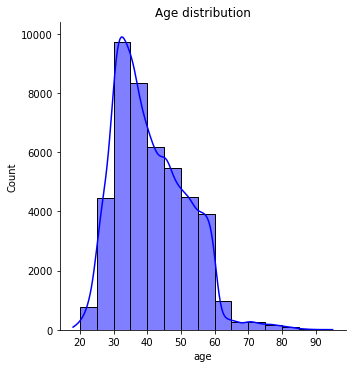

In [40]:
sns.displot(df["age"],kde=True,bins = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95],color ="blue")
plt.title('Age distribution')
plt.show()

### salary distribution

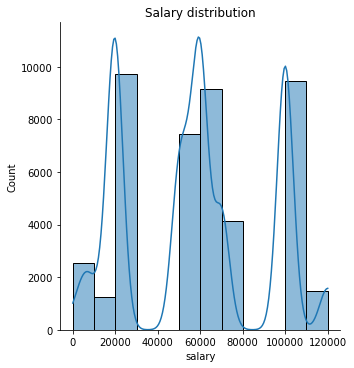

In [41]:
sns.displot(df["salary"],kde=True,bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000])
plt.title('Salary distribution')
plt.show()

### marital status

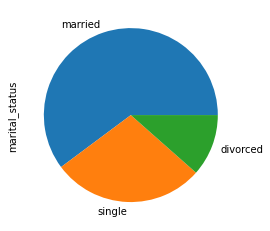

In [42]:
df["marital_status"].value_counts().plot(kind='pie');

- majority of them are married

### job distribution

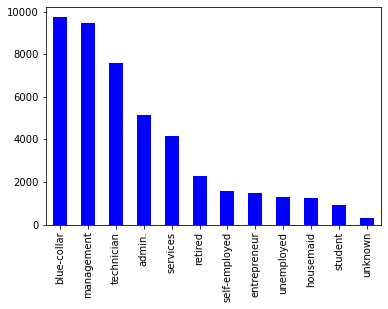

In [43]:
df["job"].value_counts().plot(kind='bar',color="blue");

### education

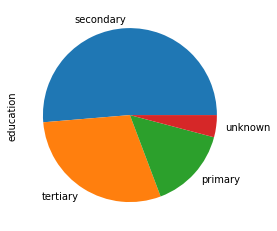

In [44]:
df["education"].value_counts().plot(kind='pie');

In [45]:
#pd.set_option('display.float_format', '{:.2%}'.format)
df["job"].value_counts(normalize=True)

blue-collar      0.215290
management       0.209247
technician       0.168035
admin.           0.114340
services         0.091853
retired          0.050087
self-employed    0.034860
entrepreneur     0.032890
unemployed       0.028840
housemaid        0.027423
student          0.020761
unknown          0.006374
Name: job, dtype: float64

### response count

In [46]:
#pd.set_option('display.float_format', '{:.2%}'.format)
df["response"].value_counts(normalize=True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

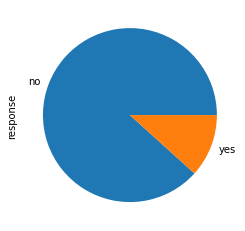

In [47]:
df["response"].value_counts().plot(kind='pie');

### loans

In [48]:
#pd.set_option('display.float_format', '{:.2%}'.format)
df["other_loans"].value_counts(normalize=True)

no     0.8398
yes    0.1602
Name: other_loans, dtype: float64

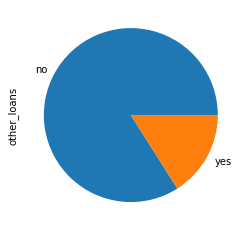

In [49]:
df["other_loans"].value_counts().plot(kind='pie');

In [50]:
#pd.set_option('display.float_format', '{:.2%}'.format)
df["housing_loan"].value_counts(normalize=True)

yes    0.555809
no     0.444191
Name: housing_loan, dtype: float64

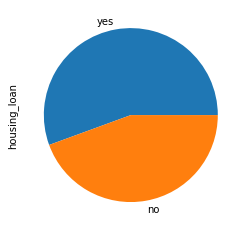

In [51]:
df["housing_loan"].value_counts().plot(kind='pie');

In [52]:
df.head()

,age,salary,balance,marital_status,job,education,targeted,default,housing_loan,other_loans,contact_type,date,month,call_duration(min),campaign,passedby_days,previous_contact,previous_outcome,response,date_time
customerid,,,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,management,tertiary,yes,no,yes,no,unknown,05-05-2017,may,4.35,1,-1,0,unknown,no,5-may- 2017
2,44.0,60000,29,single,technician,secondary,yes,no,yes,no,unknown,05-05-2017,may,2.52,1,-1,0,unknown,no,5-may- 2017
3,33.0,120000,2,married,entrepreneur,secondary,yes,no,yes,yes,unknown,05-05-2017,may,1.27,1,-1,0,unknown,no,5-may- 2017
4,47.0,20000,1506,married,blue-collar,unknown,no,no,yes,no,unknown,05-05-2017,may,1.53,1,-1,0,unknown,no,5-may- 2017
5,33.0,0,1,single,unknown,unknown,no,no,no,no,unknown,05-05-2017,may,3.30,1,-1,0,unknown,no,5-may- 2017


### response == yes analysis

In [53]:
twent = df[df["response"] == "yes"]
twent.head()

,age,salary,balance,marital_status,job,education,targeted,default,housing_loan,other_loans,contact_type,date,month,call_duration(min),campaign,passedby_days,previous_contact,previous_outcome,response,date_time
customerid,,,,,,,,,,,,,,,,,,,,
84,59.0,50000,2343,married,admin.,secondary,yes,no,yes,no,unknown,05-05-2017,may,17.37,1,-1,0,unknown,yes,5-may- 2017
87,56.0,50000,45,married,admin.,secondary,yes,no,no,no,unknown,05-05-2017,may,24.45,1,-1,0,unknown,yes,5-may- 2017
88,41.0,60000,1270,married,technician,secondary,yes,no,yes,no,unknown,05-05-2017,may,23.15,1,-1,0,unknown,yes,5-may- 2017
130,55.0,70000,2476,married,services,secondary,yes,no,yes,no,unknown,05-05-2017,may,9.65,1,-1,0,unknown,yes,5-may- 2017
169,54.0,50000,184,married,admin.,tertiary,yes,no,no,no,unknown,05-05-2017,may,11.22,2,-1,0,unknown,yes,5-may- 2017


### MEAN CALL duration

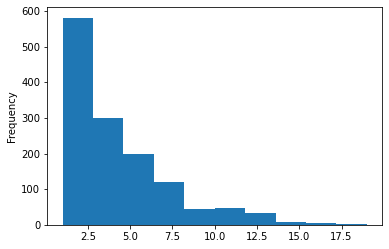

In [54]:
twent["call_duration(min)"].value_counts().plot(kind = "hist");

In [55]:
twent["call_duration(min)"].mean()

8.956033667486246

### previous outcomes vs response success

<AxesSubplot:ylabel='previous_outcome'>

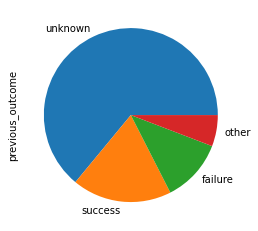

In [56]:
twent["previous_outcome"].value_counts().plot(kind = "pie")

In [57]:
twent["previous_outcome"].value_counts(normalize=True)

unknown    0.640061
success    0.184982
failure    0.116890
other      0.058067
Name: previous_outcome, dtype: float64

In [58]:
twent["response"].value_counts()

yes    5287
Name: response, dtype: int64

### majority of them were previously not contacted , need to focus more on new customers

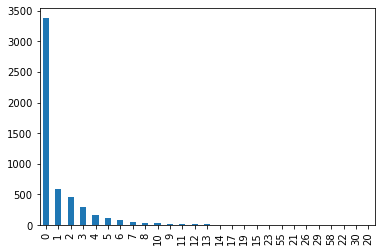

In [59]:
twent["previous_contact"].value_counts().plot(kind = "bar");

### passedby_days

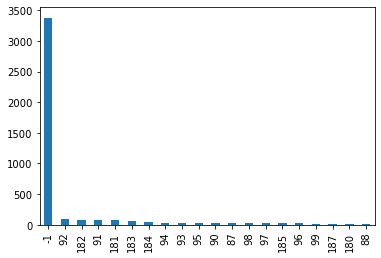

In [60]:
twent["passedby_days"].value_counts().head(20).plot(kind ="bar");

In [61]:
twent["passedby_days"].value_counts(normalize=True)

-1      0.639682
 92     0.018158
 182    0.015131
 91     0.014186
 181    0.013997
          ...   
 201    0.000189
 230    0.000189
 310    0.000189
 387    0.000189
 33     0.000189
Name: passedby_days, Length: 423, dtype: float64

### contact type

In [62]:
twent["contact_type"].value_counts(normalize=True)

cellular     0.825988
unknown      0.100246
telephone    0.073766
Name: contact_type, dtype: float64

<AxesSubplot:ylabel='contact_type'>

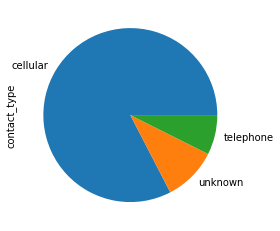

In [63]:
twent["contact_type"].value_counts(normalize=True).plot(kind ="pie")

In [64]:
df.head(2)

,age,salary,balance,marital_status,job,education,targeted,default,housing_loan,other_loans,contact_type,date,month,call_duration(min),campaign,passedby_days,previous_contact,previous_outcome,response,date_time
customerid,,,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,management,tertiary,yes,no,yes,no,unknown,05-05-2017,may,4.35,1,-1,0,unknown,no,5-may- 2017
2,44.0,60000,29,single,technician,secondary,yes,no,yes,no,unknown,05-05-2017,may,2.52,1,-1,0,unknown,no,5-may- 2017


### housing_loan

In [65]:
twent["housing_loan"].value_counts(normalize=True)

no     0.634197
yes    0.365803
Name: housing_loan, dtype: float64

<AxesSubplot:ylabel='housing_loan'>

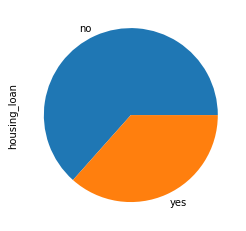

In [66]:
twent["housing_loan"].value_counts(normalize=True).plot(kind ="pie")

### other loans

In [67]:
twent["other_loans"].value_counts(normalize=True)

no     0.908455
yes    0.091545
Name: other_loans, dtype: float64

<AxesSubplot:ylabel='other_loans'>

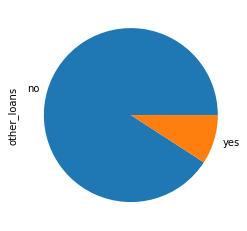

In [68]:
twent["other_loans"].value_counts(normalize=True).plot(kind ="pie")

### defaults

In [69]:
twent["default"].value_counts(normalize=True)

no     0.990165
yes    0.009835
Name: default, dtype: float64

<AxesSubplot:ylabel='default'>

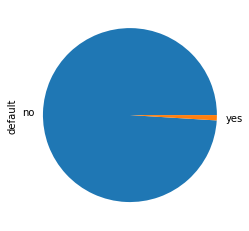

In [70]:
twent["default"].value_counts(normalize=True).plot(kind ="pie")

In [71]:
twent["targeted"].value_counts(normalize=True)

yes    0.747683
no     0.252317
Name: targeted, dtype: float64

<AxesSubplot:ylabel='targeted'>

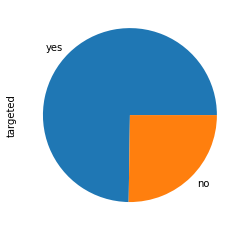

In [72]:
twent["targeted"].value_counts(normalize=True).plot(kind ="pie")

In [73]:
twent["education"].value_counts(normalize=True)

secondary    0.463212
tertiary     0.377341
primary      0.111784
unknown      0.047664
Name: education, dtype: float64

<AxesSubplot:ylabel='education'>

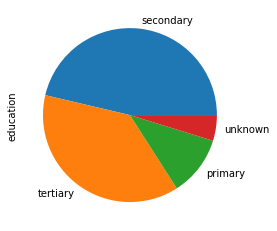

In [74]:
twent["education"].value_counts(normalize=True).plot(kind ="pie")

In [75]:
twent["job"].value_counts(normalize=True)

management       0.246075
technician       0.158880
blue-collar      0.133913
admin.           0.119160
retired          0.097598
services         0.069794
student          0.050880
unemployed       0.038207
self-employed    0.035181
entrepreneur     0.023265
housemaid        0.020617
unknown          0.006431
Name: job, dtype: float64

<AxesSubplot:>

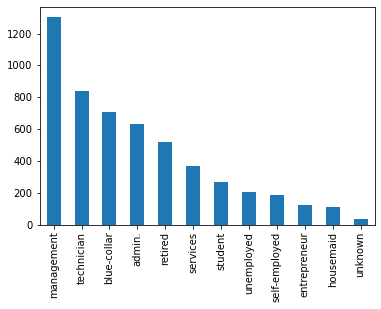

In [76]:
twent["job"].value_counts().plot(kind ="bar")

In [77]:
twent["marital_status"].value_counts(normalize=True)

married     0.520900
single      0.361453
divorced    0.117647
Name: marital_status, dtype: float64

<AxesSubplot:>

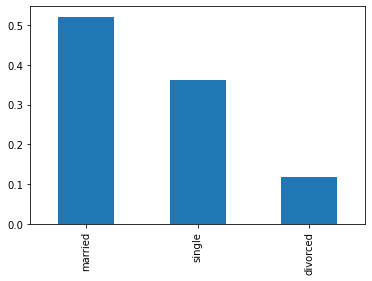

In [78]:
twent["marital_status"].value_counts(normalize=True).plot(kind ="bar")

In [79]:
twent["salary"].value_counts(normalize=True)

100000    0.246075
60000     0.194061
20000     0.133913
50000     0.119160
55000     0.097598
70000     0.069794
4000      0.050880
8000      0.038207
120000    0.023265
16000     0.020617
0         0.006431
Name: salary, dtype: float64

In [80]:
twent["salary"].mean()

58771.704180064306

<AxesSubplot:>

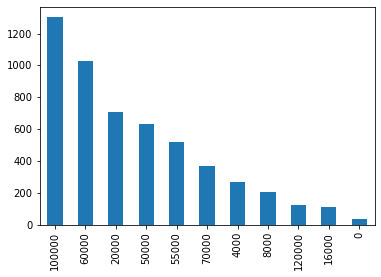

In [81]:
twent["salary"].value_counts().plot(kind ="bar")

In [82]:
twent["age"].value_counts(normalize=True).head(10)

32.0    0.041801
30.0    0.041044
33.0    0.039720
35.0    0.039531
31.0    0.038963
34.0    0.037450
36.0    0.036883
37.0    0.032154
29.0    0.032154
28.0    0.030641
Name: age, dtype: float64

In [83]:
twent["age"].mean()

41.6714582939285

<AxesSubplot:>

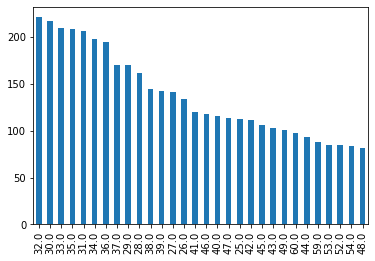

In [84]:
twent["age"].value_counts().head(30).plot(kind ="bar")

### Outlier plots

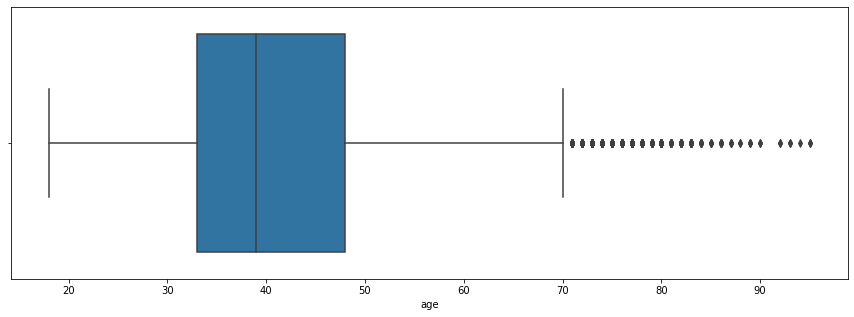

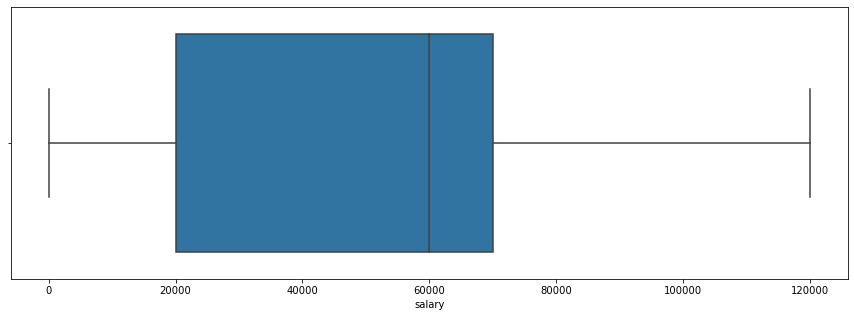

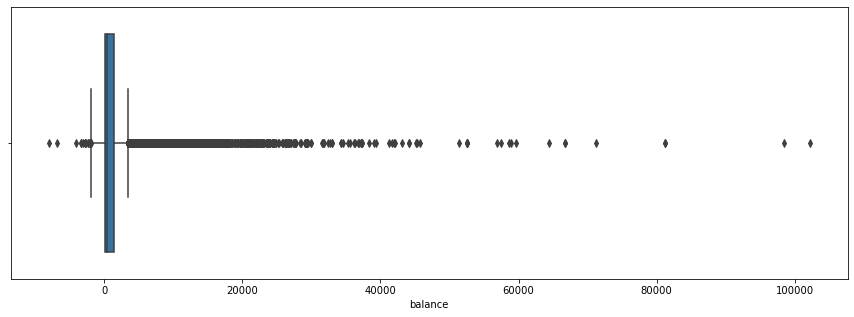

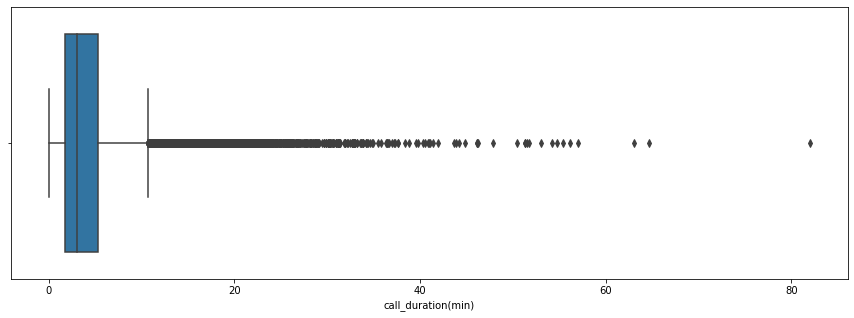

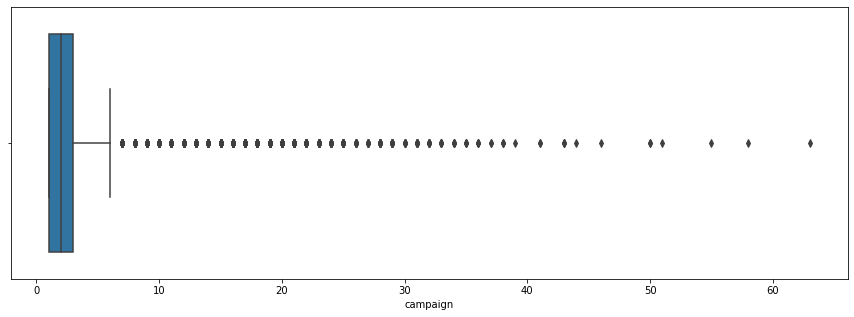

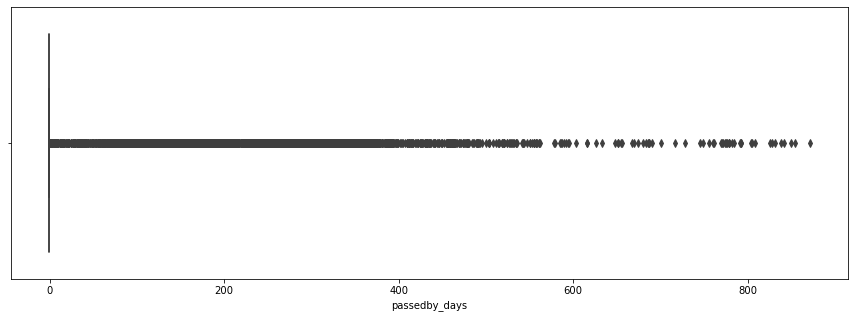

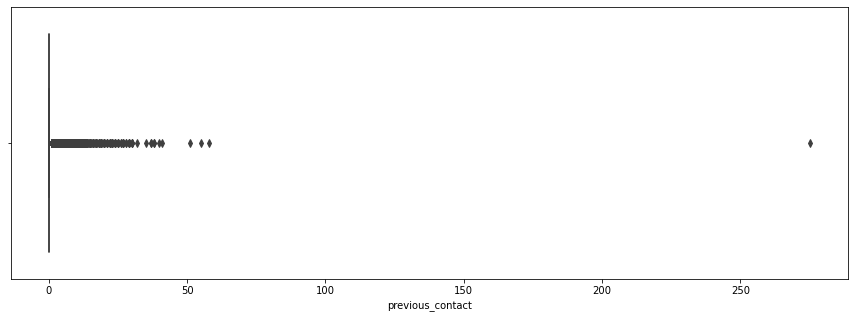

In [85]:
col=["age","salary","balance","call_duration(min)","campaign","passedby_days","previous_contact"]
for i in col:
    fig = plt.figure(figsize = (15,5))
    sns.boxplot(x = i,data=df)
plt.show()

### age plot with range

In [86]:
age_1=[]
age_2=[]
age_3=[]
age_4=[]
age_5=[]
age_6=[]
age_7=[]
age_8=[]
age_9=[]
for i in df["age"]:
        if (i>=15) & (i<=25):
            age_1.append(i)
        elif (i>=25) & (i<=35):
            age_2.append(i)
        elif (i>=35) & (i<=45):
            age_3.append(i)
        elif (i>=45) & (i<=55):
            age_4.append(i)
        elif (i>=55) & (i<=65):
            age_5.append(i)
        elif (i>=65) & (i<=75):
            age_6.append(i)
        elif (i>=75) & (i<=85):
            age_7.append(i)
        elif (i>=85) & (i<=95):
            age_8.append(i)
        elif (i>=95) & (i<=95):
            age_9.append(i)
            
age_bar = {"15 - 25":len(age_1),"25 - 35":len(age_2),"35 - 45":len(age_3),"45 - 55":len(age_4),"55 - 65":len(age_5),"65 - 75":len(age_6),"75 - 85":len(age_7)}
age_bar

{'15 - 25': 1336,
 '25 - 35': 15552,
 '35 - 45': 13856,
 '45 - 55': 9542,
 '55 - 65': 4146,
 '65 - 75': 488,
 '75 - 85': 234}

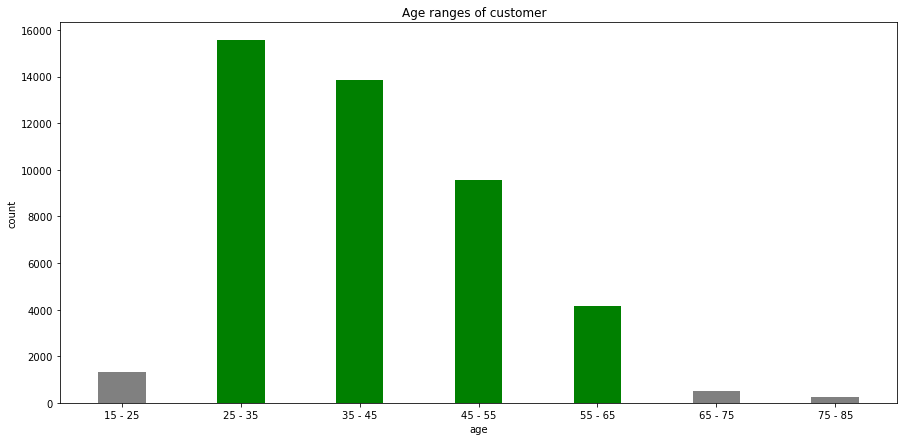

In [132]:
age_range = list(age_bar.keys())
values = list(age_bar.values())
x_pos = np.arange(len(age_range))

fig = plt.figure(figsize = (15, 7))
# Create bars with different colors
plt.bar(x_pos, values, color=[ 'grey', 'green', 'green', 'green','green',"grey"],width = 0.4)

# Create names on the x-axis
plt.xticks(x_pos, age_range)

# Show graph
 
plt.xlabel("age")
plt.ylabel("count")
plt.title("Age ranges of customer  ")
plt.show()

### salary ranges

In [88]:
age_1=[]
age_2=[]
age_3=[]
age_4=[]
age_5=[]
age_6=[]
age_7=[]
age_8=[]
age_9=[]
for i in df["salary"]:
        if (i>=0) & (i<=30000):
            age_1.append(i)
        elif (i>=30000) & (i<=60000):
            age_2.append(i)
        elif (i>=60000) & (i<=90000):
            age_3.append(i)
        elif (i>=90000) & (i<=120000):
            age_4.append(i)
        
            
sal_bar = {"0 - 30000":len(age_1),"30000 - 60000":len(age_2),"60000 - 90000":len(age_3),"90000 - 120000":len(age_4)}
sal_bar

{'0 - 30000': 13495,
 '30000 - 60000': 16596,
 '60000 - 90000': 4150,
 '90000 - 120000': 10940}

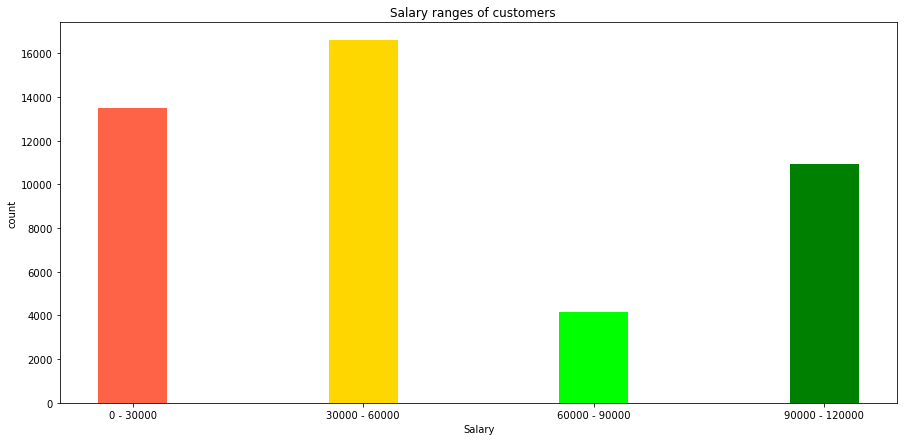

In [133]:
sal_range = list(sal_bar.keys())
values = list(sal_bar.values())
x_pos = np.arange(len(sal_range))

fig = plt.figure(figsize = (15, 7))
# Create bars with different colors
plt.bar(x_pos, values, color=['tomato', 'gold', 'lime','green'],width = 0.3)

# Create names on the x-axis
plt.xticks(x_pos, sal_range)

# Show graph
 
plt.xlabel("Salary")
plt.ylabel("count")
plt.title("Salary ranges of customers   ")
plt.show()

### sal age range wise with jobs

In [90]:
sal1 = df[df["salary"] <= 30000]
sal1["job"].value_counts(normalize = True)

blue-collar    0.720785
unemployed     0.096554
housemaid      0.091812
student        0.069507
unknown        0.021341
Name: job, dtype: float64

<AxesSubplot:ylabel='job'>

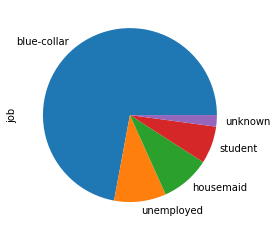

In [91]:
sal1["job"].value_counts().plot(kind ="pie")

In [92]:
sal2 = df[(df["salary"] > 30000) & (df["salary"] <= 60000) ]
sal2["job"].value_counts()

technician       7592
admin.           5166
retired          2263
self-employed    1575
Name: job, dtype: int64

<AxesSubplot:ylabel='job'>

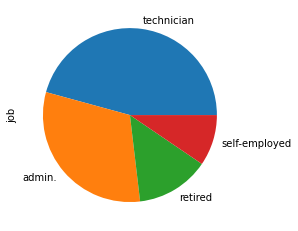

In [93]:
sal2["job"].value_counts().plot(kind ="pie")

In [94]:
sal3 = df[(df["salary"] > 60000) & (df["salary"] <= 90000) ]
sal3["job"].value_counts()

services    4150
Name: job, dtype: int64

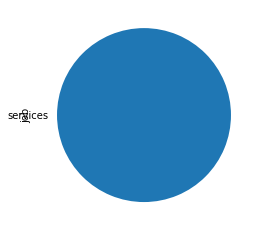

In [95]:
sal3["job"].value_counts().plot(kind ="pie");

In [96]:
sal4 = df[(df["salary"] > 90000) & (df["salary"] <= 120000) ]
sal4["job"].value_counts()

management      9454
entrepreneur    1486
Name: job, dtype: int64

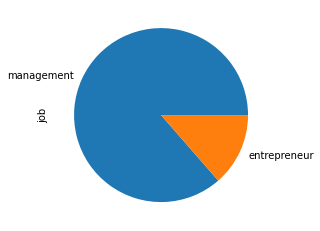

In [97]:
sal4["job"].value_counts().plot(kind ="pie");

### balance

In [98]:
age_1=[]
age_2=[]
age_3=[]
age_4=[]
age_5=[]
age_6=[]
age_7=[]

for i in df["balance"]:
        if (i< 0):
            age_1.append(i)
        elif (i > 0) & (i <= 10000):
            age_2.append(i)
        elif (i >=10000) & (i<=20000):
            age_3.append(i)
        elif (i>=20000) & (i<=30000):
            age_4.append(i)
        elif (i>30000) & (i<=40000):
            age_5.append(i)
        elif (i>40000): 
            age_6.append(i)           
bal_bar = {"Negative balance":len(age_1),"0 - 10000":len(age_2),"10000 - 20000":len(age_3),"20000 - 30000":len(age_4),"30000 - 40000":len(age_5),"More than 40000":len(age_6)}
bal_bar

{'Negative balance': 3763,
 '0 - 10000': 37078,
 '10000 - 20000': 636,
 '20000 - 30000': 141,
 '30000 - 40000': 24,
 'More than 40000': 28}

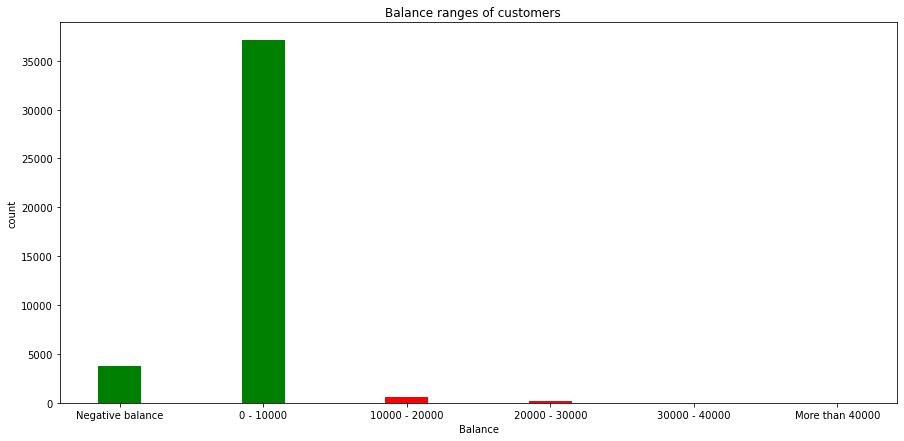

In [134]:
bal_range = list(bal_bar.keys())
values = list(bal_bar.values())
x_pos = np.arange(len(bal_range))

fig = plt.figure(figsize = (15, 7))
# Create bars with different colors
plt.bar(x_pos, values, color=['green', 'green',"red","red","violet","red","red"],width = 0.3)

# Create names on the x-axis
plt.xticks(x_pos, bal_range)

# Show graph
 
plt.xlabel("Balance")
plt.ylabel("count")
plt.title("Balance ranges of customers   ")
plt.show()

### marital

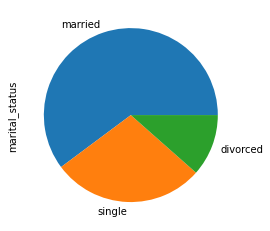

In [100]:
df["marital_status"].value_counts().plot(kind='pie');

### Education

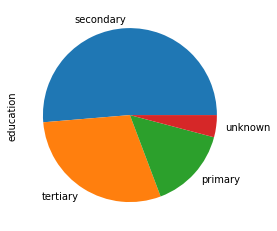

In [101]:
df["education"].value_counts().plot(kind='pie');

### job

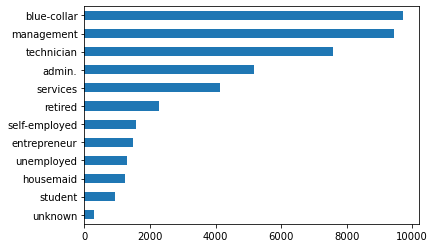

In [102]:
df["job"].value_counts().sort_values().plot(kind='barh');

In [103]:
sal_mean = df.groupby('salary').median()
sal_mean

,age,balance,call_duration(min),campaign,passedby_days,previous_contact
salary,,,,,,
0,47.0,677.0,2.75,2.0,-1.0,0.0
4000,26.0,502.0,3.00,2.0,-1.0,0.0
8000,40.0,529.0,3.33,2.0,-1.0,0.0
16000,47.0,403.0,2.72,2.0,-1.0,0.0
20000,39.0,388.0,3.10,2.0,-1.0,0.0
50000,38.0,396.0,2.90,2.0,-1.0,0.0
55000,59.0,785.0,3.40,2.0,-1.0,0.0
60000,38.0,433.0,2.93,2.0,-1.0,0.0
70000,37.0,339.5,3.10,2.0,-1.0,0.0


### sal mean

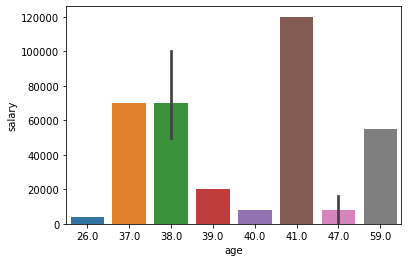

In [104]:
sns.barplot(x = sal_mean.age ,y = sal_mean.index);

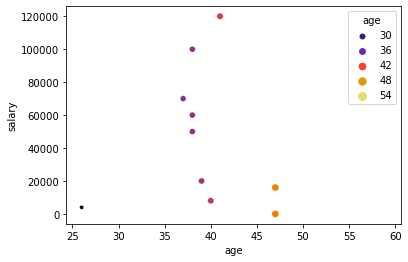

In [105]:
sns.scatterplot(data=sal_mean,x = sal_mean.age ,y = sal_mean.index,hue="age",size="age",palette="CMRmap");

In [106]:
bal = df.loc[(df["balance"] >=2500 )]
bal_mean = bal.groupby('balance').median()
bal_mean

,age,salary,call_duration(min),campaign,passedby_days,previous_contact
balance,,,,,,
2500,50.5,34000.0,2.515,1.5,-1.0,0.0
2501,44.5,60000.0,3.965,2.0,-1.0,0.0
2502,33.0,20000.0,4.750,1.0,-1.0,0.0
2503,26.0,4000.0,2.020,1.0,-1.0,0.0
2505,41.5,25000.0,4.625,2.5,-1.0,0.0
...,...,...,...,...,...,...
66721,56.0,100000.0,7.370,2.0,-1.0,0.0
71188,60.0,55000.0,3.420,1.0,-1.0,0.0
81204,84.0,55000.0,8.910,1.0,203.5,2.5


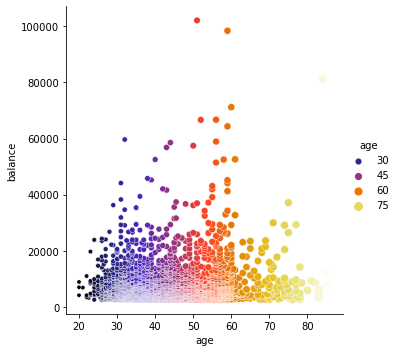

In [107]:
sns.relplot(data =bal_mean, x = "age" ,y = bal_mean.index,hue="age",size ="age",kind="scatter",palette="CMRmap");

## Age vs response

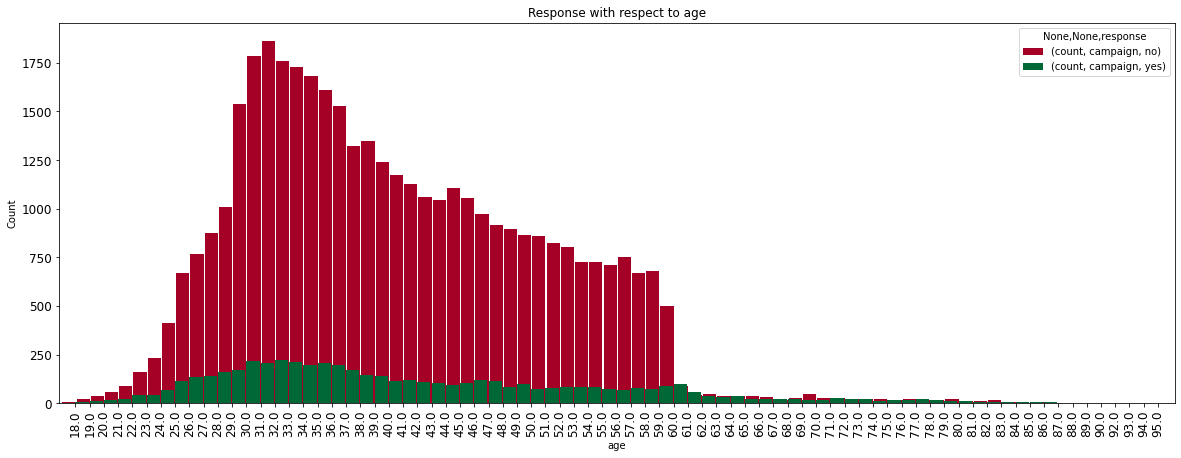

In [108]:
table = pd.pivot_table(df,index=['age'],columns=['response'],values=['campaign'],observed=True,aggfunc=["count"])
ax = table.plot(kind='bar',figsize=(20,7),fontsize=12,title="Response with respect to age",colormap="RdYlGn",ylabel="Count",width=1.85);

## age vs previous_outcome

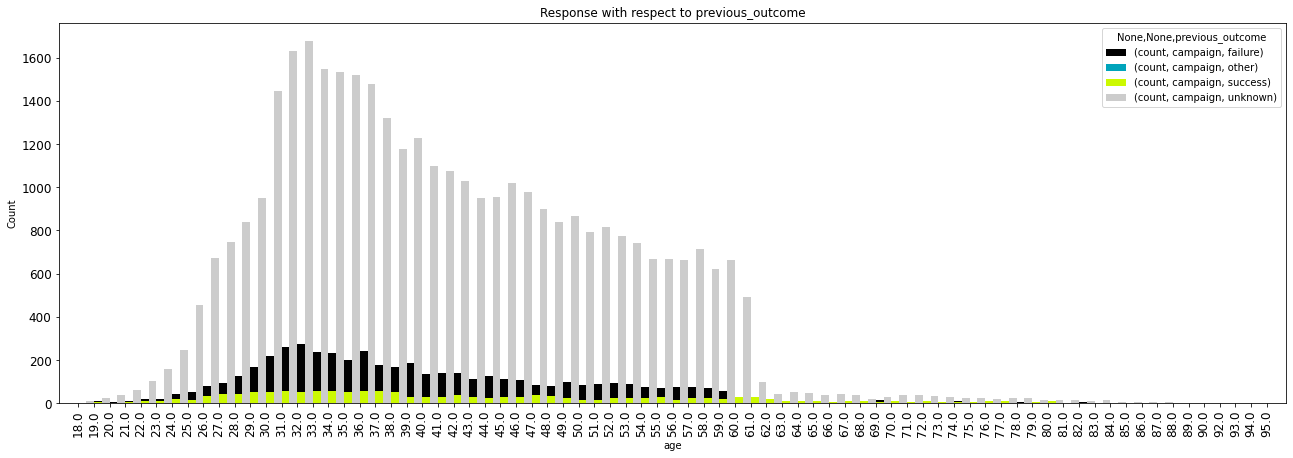

In [109]:
table1 = pd.pivot_table(df,index=['age'],columns=['previous_outcome'],values=['campaign'],observed=True,aggfunc=["count"])
ax = table1.plot(kind='bar',figsize=(22,7),fontsize=12,title="Response with respect to previous_outcome",colormap="nipy_spectral",ylabel="Count",width=2);

## job vs response

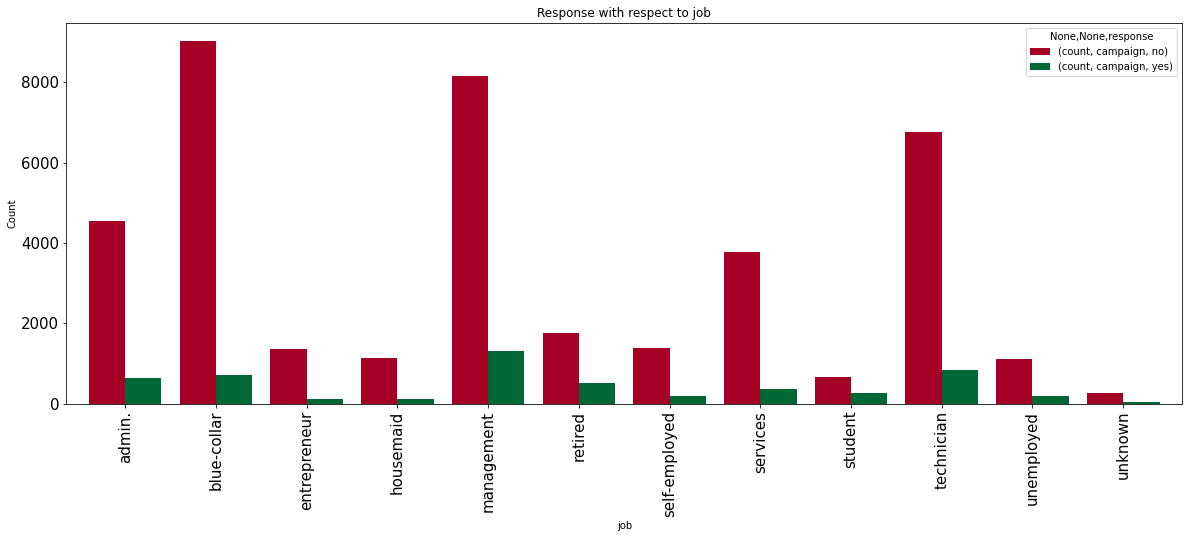

In [110]:
table2 = pd.pivot_table(df,index=['job'],columns=['response'],values=['campaign'],observed=True,aggfunc=["count"])
ax = table2.plot(kind='bar',figsize=(20,7),fontsize=15,title="Response with respect to job",colormap="RdYlGn",ylabel="Count",width=0.8);

### Salary vs response

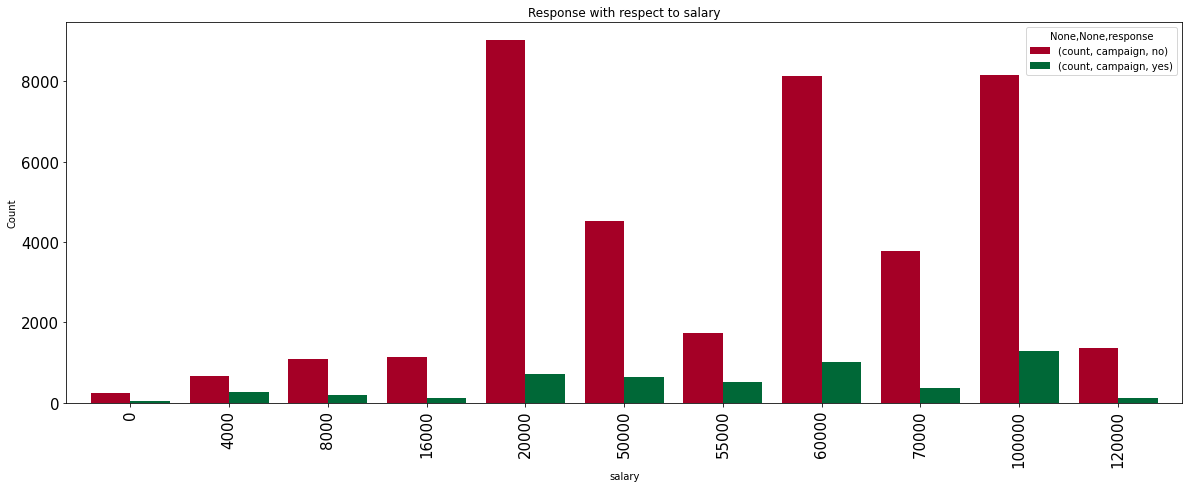

In [111]:
table3 = pd.pivot_table(df,index=['salary'],columns=['response'],values=['campaign'],observed=True,aggfunc=["count"])
ax = table3.plot(kind='bar',figsize=(20,7),fontsize=15,title="Response with respect to salary",colormap="RdYlGn",ylabel="Count",width=0.8);

### marital Vs response Vs balance

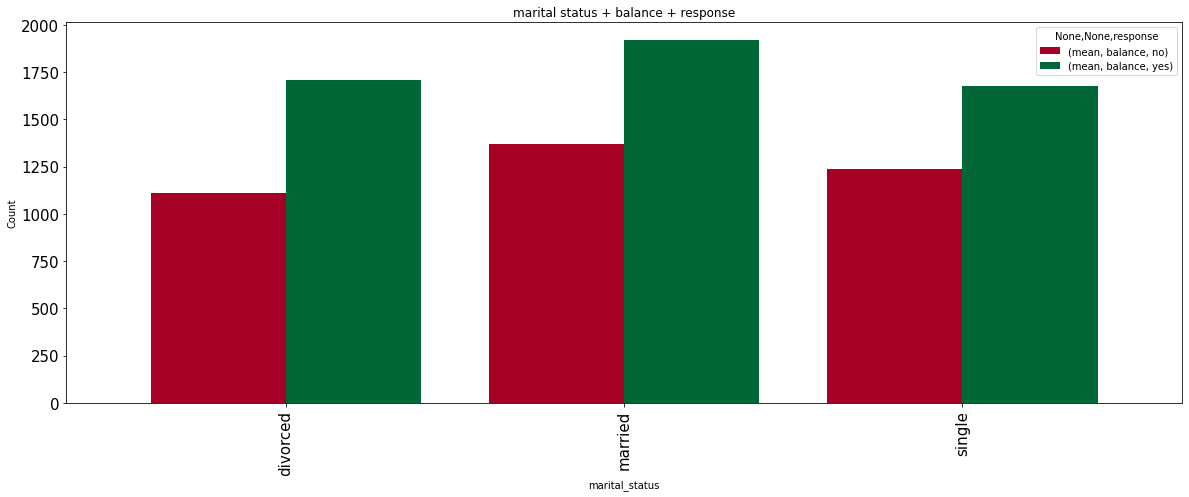

In [112]:
table3 = pd.pivot_table(df,index=['marital_status'],columns=['response'],values=['balance'],observed=True,aggfunc=["mean"])
ax = table3.plot(kind='bar',figsize=(20,7),fontsize=15,title="marital status + balance + response",colormap="RdYlGn",ylabel="Count",width=0.8);

### job vs response vs balance

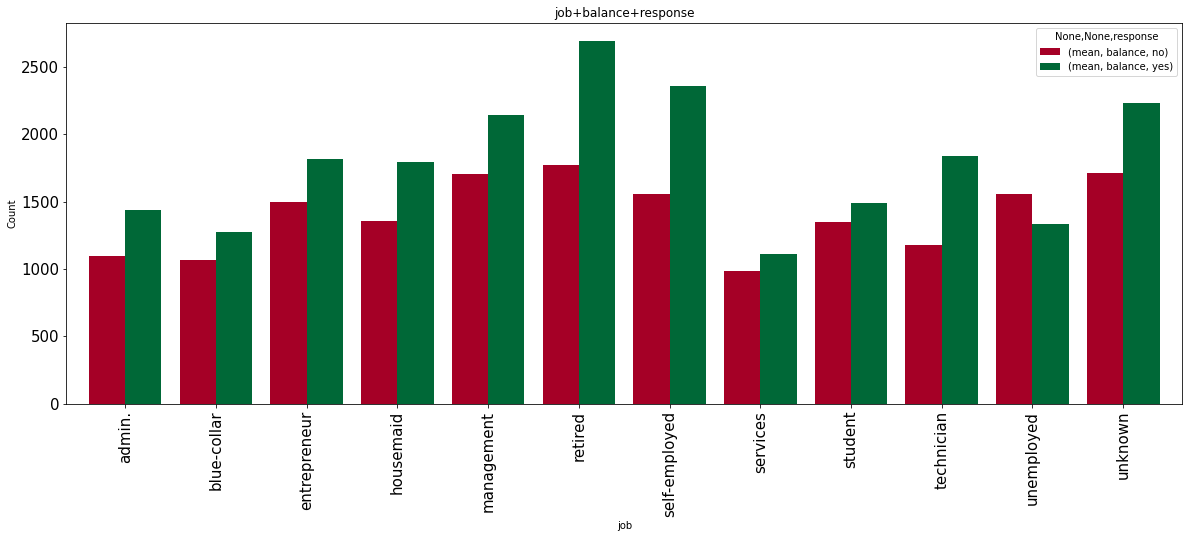

In [113]:
table3 = pd.pivot_table(df,index=['job'],columns=['response'],values=['balance'],observed=True,aggfunc=["mean"])
ax = table3.plot(kind='bar',figsize=(20,7),fontsize=15,title="job+balance+response",colormap="RdYlGn",ylabel="Count",width=0.8);

### education vs response vs balance

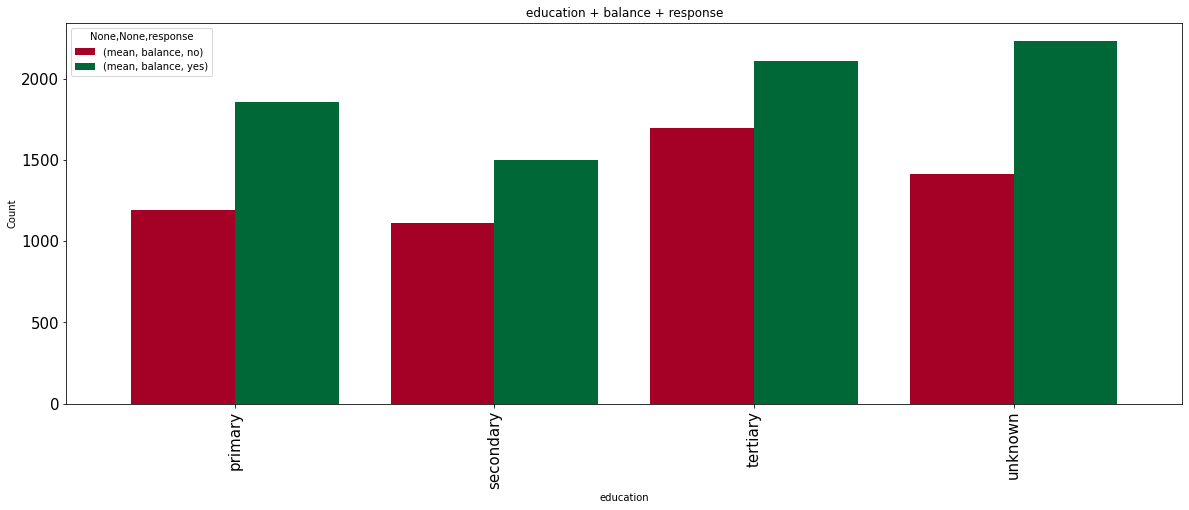

In [114]:
table3 = pd.pivot_table(df,index=['education'],columns=['response'],values=['balance'],observed=True,aggfunc=["mean"])
ax = table3.plot(kind='bar',figsize=(20,7),fontsize=15,title="education + balance + response",colormap="RdYlGn",ylabel="Count",width=0.8);

### target vs response vs balance

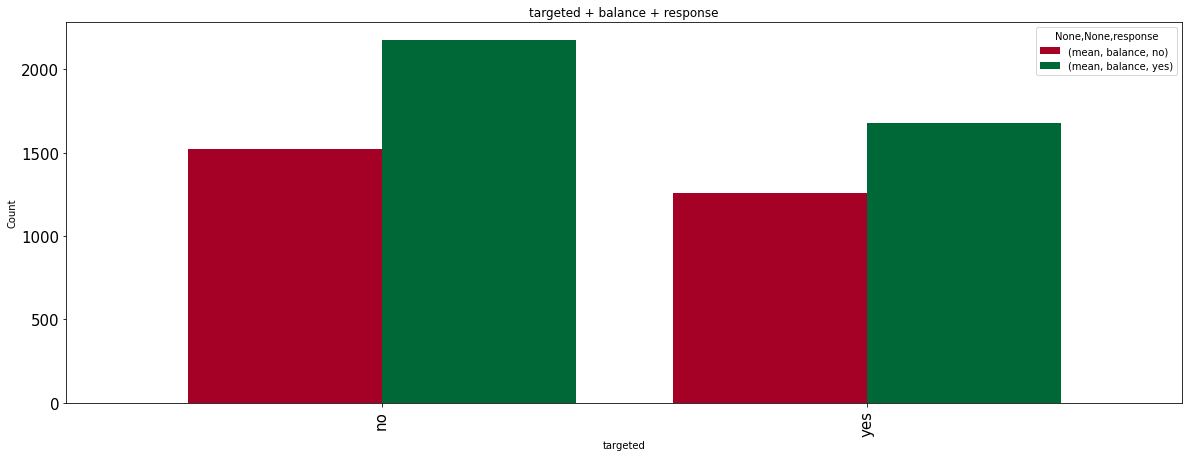

In [115]:
table3 = pd.pivot_table(df,index=['targeted'],columns=['response'],values=['balance'],observed=True,aggfunc=["mean"])
ax = table3.plot(kind='bar',figsize=(20,7),fontsize=15,title="targeted + balance + response",colormap="RdYlGn",ylabel="Count",width=0.8);

### default vs response vs balance

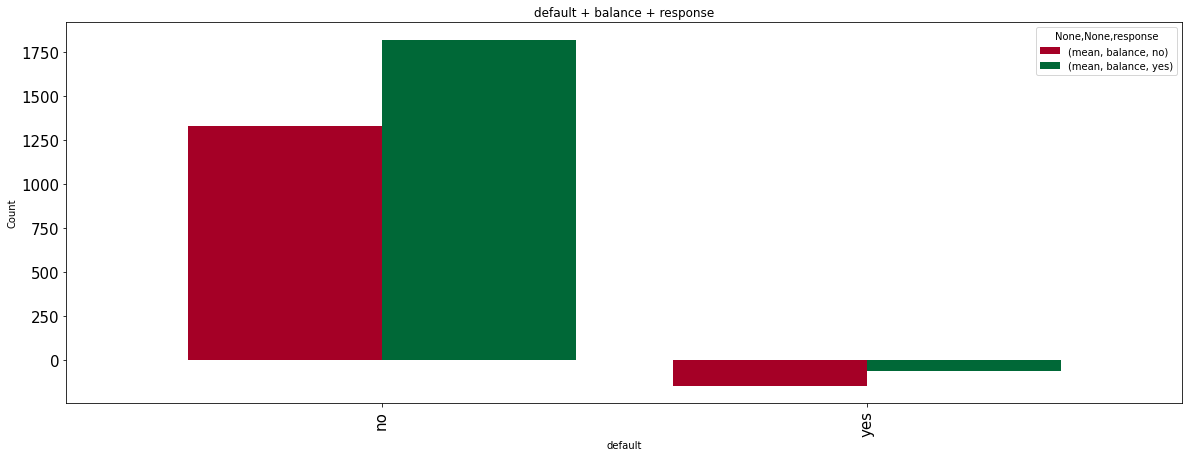

In [116]:
table3 = pd.pivot_table(df,index=['default'],columns=['response'],values=['balance'],observed=True,aggfunc=["mean"])
ax = table3.plot(kind='bar',figsize=(20,7),fontsize=15,title="default + balance + response",colormap="RdYlGn",ylabel="Count",width=0.8);

### job vs response vs balance

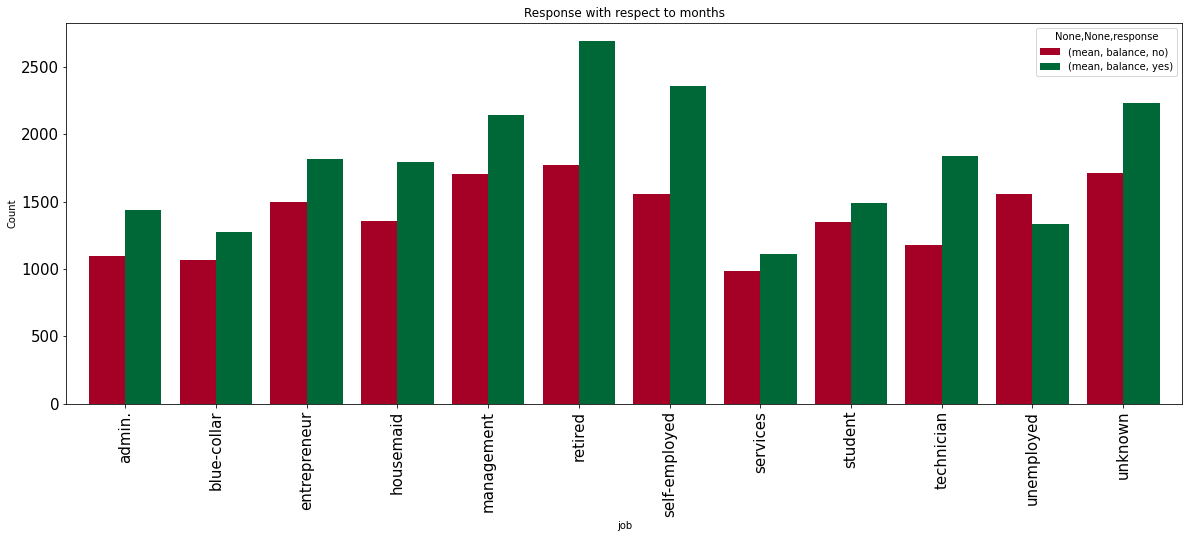

In [117]:
table3 = pd.pivot_table(df,index=['job'],columns=['response'],values=['balance'],observed=True,aggfunc=["mean"])
ax = table3.plot(kind='bar',figsize=(20,7),fontsize=15,title="Response with respect to months",colormap="RdYlGn",ylabel="Count",width=0.8);

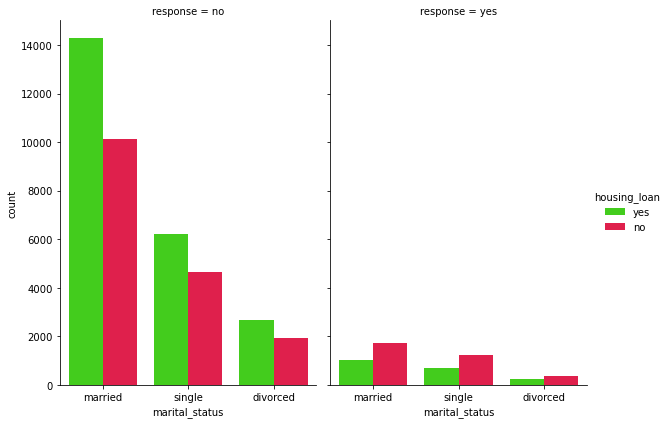

In [122]:
sns.catplot(x="marital_status", hue="housing_loan", col="response",

                data=df, kind="count",

                height=6,aspect=.7,palette="prism");

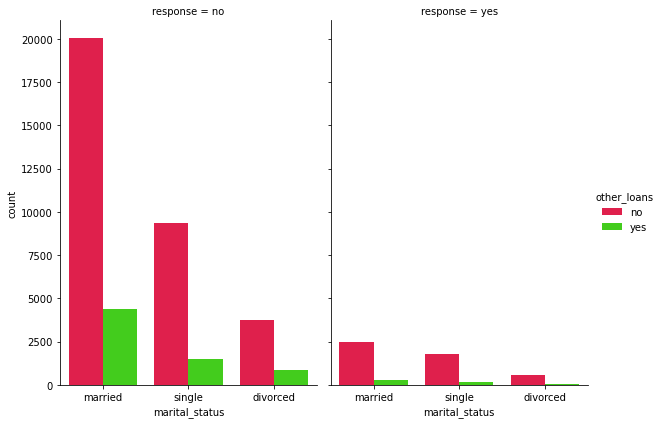

In [123]:
sns.catplot(x="marital_status", hue="other_loans", col="response",

                data=df, kind="count",

                height=6,aspect=.7,palette="prism_r");

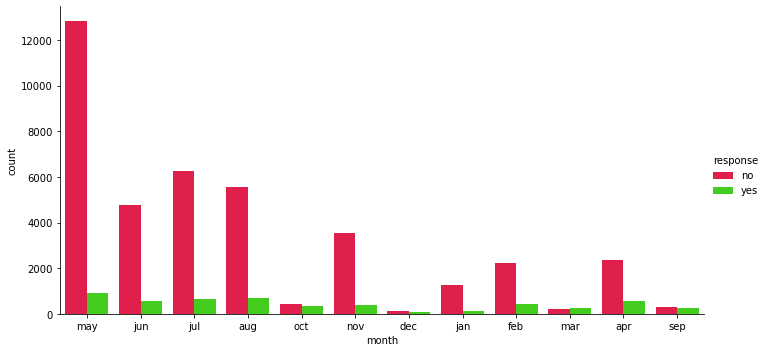

In [124]:
sns.catplot(x="month", hue="response",

                data=df, kind="count",

                height=5,aspect=2,palette="prism_r");

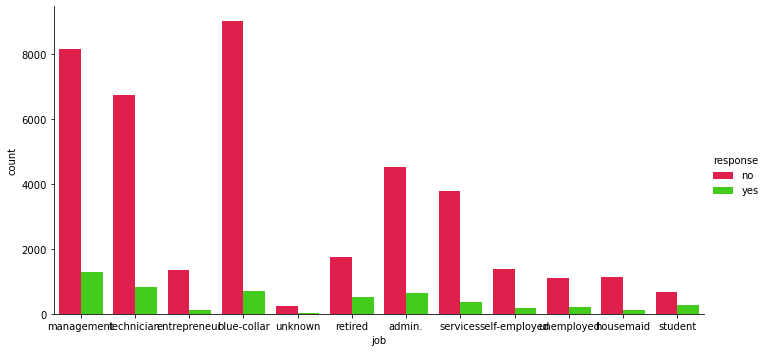

In [125]:
sns.catplot(x="job", hue="response",

                data=df, kind="count",

                height=5,aspect=2,palette="prism_r");

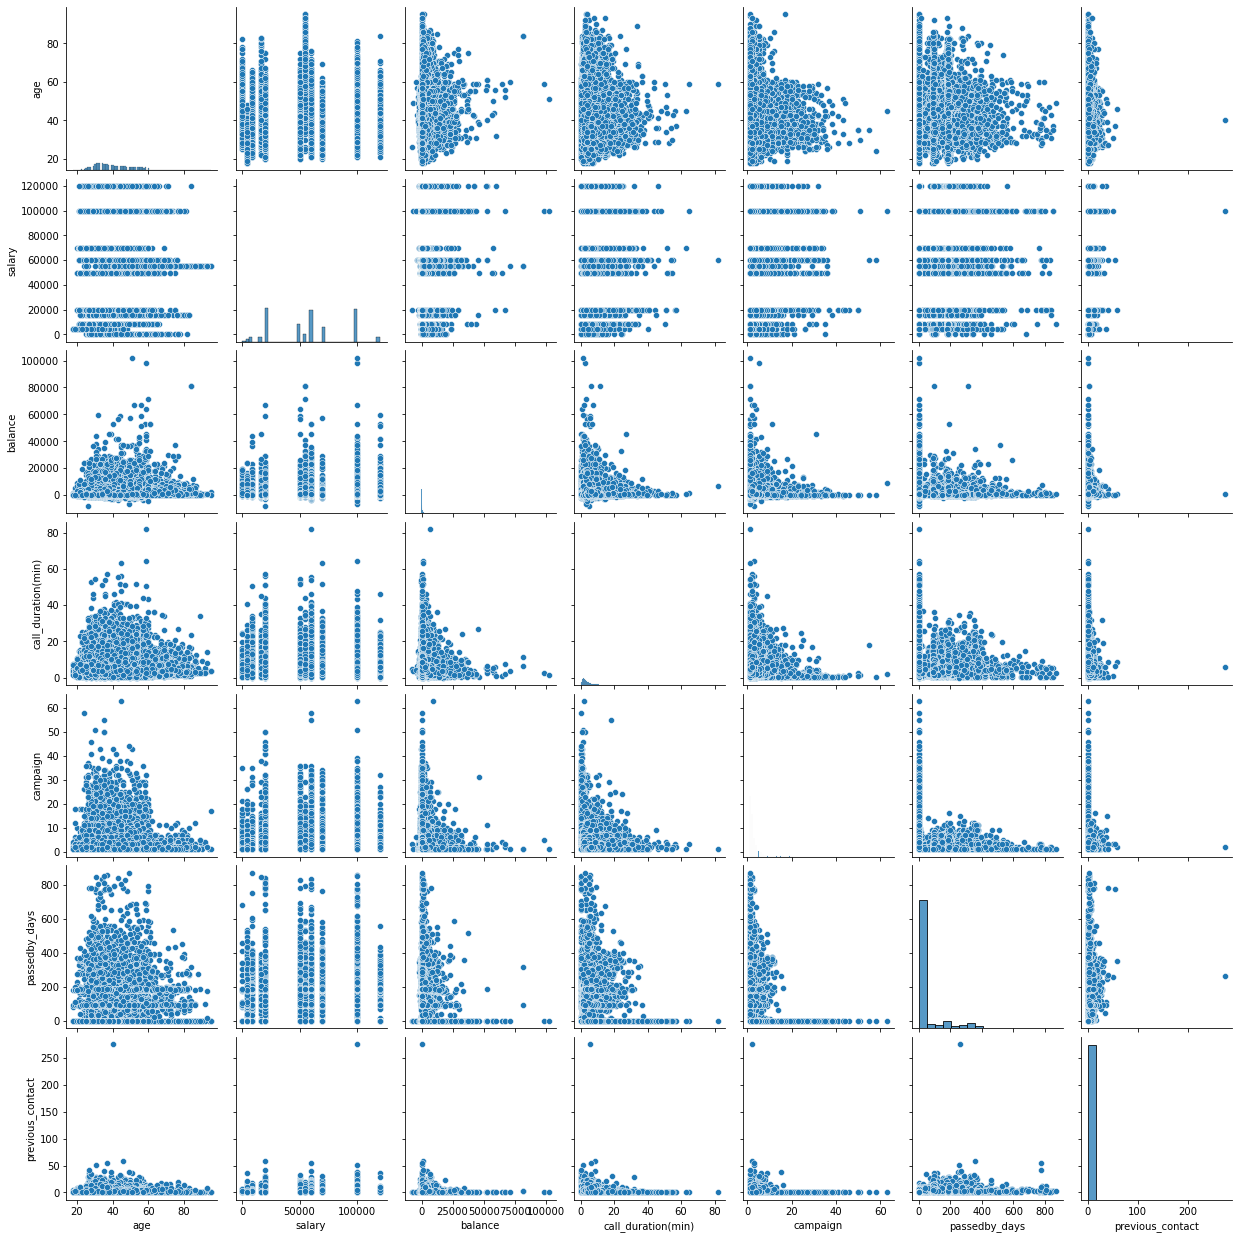

In [126]:
sns.pairplot(df,palette ="CMRmap");

In [127]:
df.head()

,age,salary,balance,marital_status,job,education,targeted,default,housing_loan,other_loans,contact_type,date,month,call_duration(min),campaign,passedby_days,previous_contact,previous_outcome,response,date_time
customerid,,,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,management,tertiary,yes,no,yes,no,unknown,05-05-2017,may,4.35,1,-1,0,unknown,no,5-may- 2017
2,44.0,60000,29,single,technician,secondary,yes,no,yes,no,unknown,05-05-2017,may,2.52,1,-1,0,unknown,no,5-may- 2017
3,33.0,120000,2,married,entrepreneur,secondary,yes,no,yes,yes,unknown,05-05-2017,may,1.27,1,-1,0,unknown,no,5-may- 2017
4,47.0,20000,1506,married,blue-collar,unknown,no,no,yes,no,unknown,05-05-2017,may,1.53,1,-1,0,unknown,no,5-may- 2017
5,33.0,0,1,single,unknown,unknown,no,no,no,no,unknown,05-05-2017,may,3.30,1,-1,0,unknown,no,5-may- 2017


### job oth res

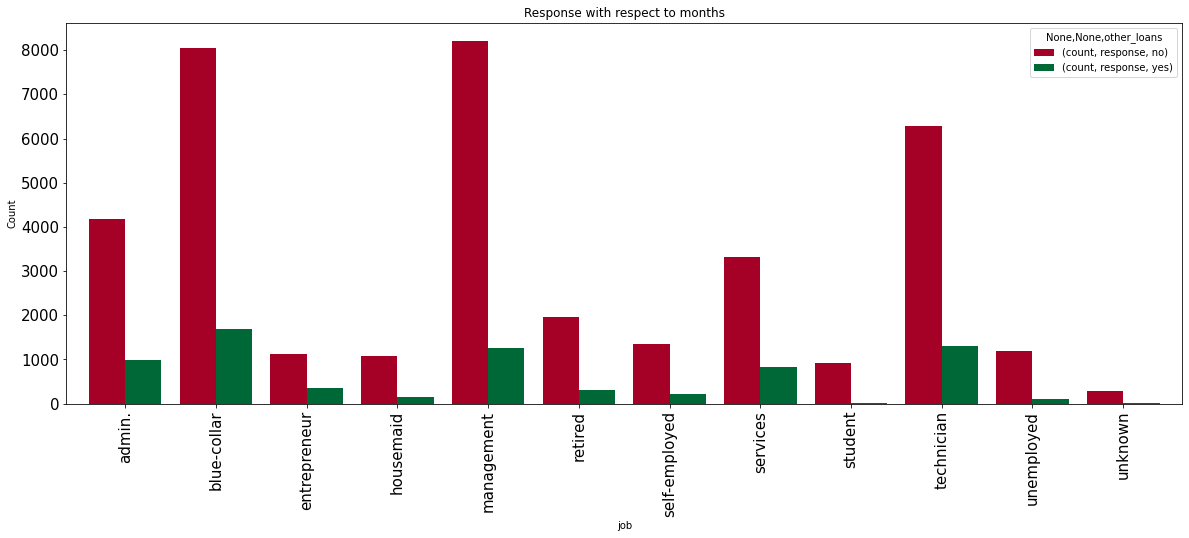

In [128]:
table3 = pd.pivot_table(df,index=['job'],columns=['other_loans'],values=['response'],observed=True,aggfunc=["count"])
ax = table3.plot(kind='bar',figsize=(20,7),fontsize=15,title="Response with respect to months",colormap="RdYlGn",ylabel="Count",width=0.8);

<AxesSubplot:>

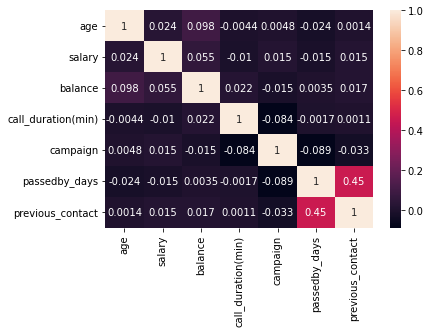

In [129]:
sns.heatmap(df.corr(),annot = True)

In [130]:
df.isnull().sum()

age                   0
salary                0
balance               0
marital_status        0
job                   0
education             0
targeted              0
default               0
housing_loan          0
other_loans           0
contact_type          0
date                  0
month                 0
call_duration(min)    0
campaign              0
passedby_days         0
previous_contact      0
previous_outcome      0
response              0
date_time             0
dtype: int64

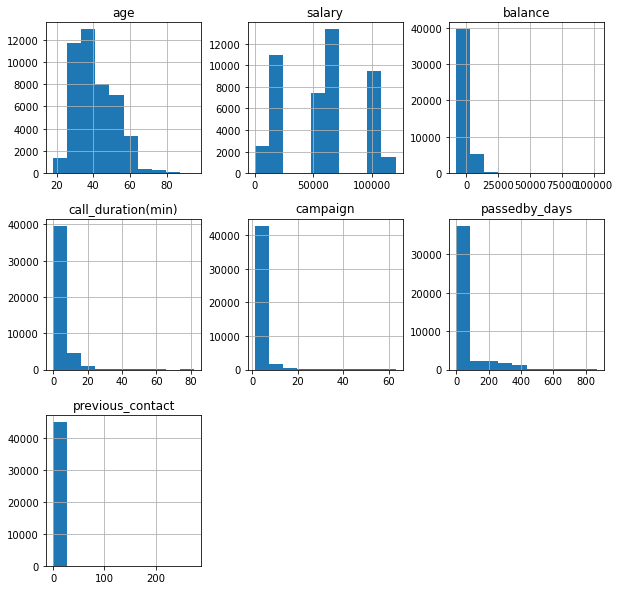

In [135]:
df.hist(figsize=(10,10));

### interactive visualizations (with ipywidgets)

In [137]:
from ipywidgets import interact, interact_manual

In [146]:
@interact_manual
def barplot(col = df.select_dtypes('object'),
           col1 = df.select_dtypes('number')):
    sns.boxplot(df[col],df[col1],hue = df['response']);

interactive(children=(Dropdown(description='col', options=('marital_status', 'job', 'education', 'targeted', '…

In [140]:
@interact
def analysis(col = df.select_dtypes('object'),
           col1 = df.select_dtypes('number')):
    return df.groupby(col)[col1].agg({'min','max','mean'})

interactive(children=(Dropdown(description='col', options=('marital_status', 'job', 'education', 'targeted', '…

In [142]:
pd.cut(df['salary'],[0,30000,60000,90000,120000]).value_counts(normalize = True)

(30000, 60000]     0.369679
(0, 30000]         0.294188
(90000, 120000]    0.243691
(60000, 90000]     0.092442
Name: salary, dtype: float64

In [143]:
pd.cut(df['age'],[0,18,25,50,75,100]).value_counts(normalize = True)

(25, 50]     0.765831
(50, 75]     0.198823
(18, 25]     0.029304
(75, 100]    0.005777
(0, 18]      0.000266
Name: age, dtype: float64

In [144]:
pd.cut(df['call_duration(min)'],8).value_counts(normalize = True)

(-0.082, 10.246]    0.920564
(10.246, 20.492]    0.068192
(20.492, 30.739]    0.009207
(30.739, 40.985]    0.001483
(40.985, 51.231]    0.000266
(51.231, 61.478]    0.000221
(61.478, 71.724]    0.000044
(71.724, 81.97]     0.000022
Name: call_duration(min), dtype: float64